In [1]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential,Model
from tensorflow.keras.layers import Input
from keras.layers import Dense, Dropout, Flatten
#from keras.layers import Conv2D, MaxPooling2D
#from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, Conv2D
)
from keras.layers import LeakyReLU

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  0


# Leer imágenes 

Este código está diseñado para recorrer un directorio específico y sus subdirectorios, leer todas las imágenes con extensiones .jpg, .jpeg, .png, .bmp, o .tiff, y almacenar información sobre estas imágenes y los directorios donde se encuentran.

In [2]:
from PIL import Image
import os
import re

dirname = os.path.join(os.getcwd(), r'C:\Users\avalo\Desktop\CNN carros\Dataset2')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot = ''
cant = 0

print("Leyendo imágenes de", imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search(r"\.(jpg|jpeg|png|bmp|webp|tiff)$", filename, re.IGNORECASE):
            filepath = os.path.join(root, filename)
            try:
                with Image.open(filepath) as img:
                    if img.mode in ["RGB", "RGBA"]:
                        images.append(img.copy())
                    cant += 1
            except Exception as e:
                print(f"Error al leer el archivo {filepath}: {e}")
            if prevRoot != root:
                directories.append(root)
                dircount.append(cant)
                cant = 0
                prevRoot = root
dircount.append(cant)
dircount = dircount[1:]
dircount[0] += 1

print('Directorios leídos:', len(directories))
print("Imágenes en cada directorio:", dircount)
print('Suma total de imágenes en subdirs:', sum(dircount))


Leyendo imágenes de C:\Users\avalo\Desktop\CNN carros\Dataset2\
Directorios leídos: 5
Imágenes en cada directorio: [1237, 1307, 1382, 2280, 1687]
Suma total de imágenes en subdirs: 7893


# Generación de Etiquetas 

Esta sección del código está asignando una etiqueta numérica a cada imagen basada en el directorio del que proviene. Si un directorio tiene 5 imágenes, todas esas imágenes tendrán la misma etiqueta (por ejemplo, 0), y luego la etiqueta cambiará para el próximo directorio. Esto es útil para clasificar las imágenes según sus directorios de origen.

In [3]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))

Cantidad etiquetas creadas:  7893


Esta sección del código permite identificar y almacenar los nombres de los subdirectorios de manera organizada, lo cual puede ser útil para el análisis posterior o para referenciar los datos procesados.

In [4]:
sriesgos=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    sriesgos.append(name[len(name)-1])
    indice=indice+1

0 Cheyenne
1 Hummer
2 Lamborghini
3 Tsuru
4 Vocho


Esta sección del código convierte las listas de etiquetas e imágenes en arreglos de NumPy para facilitar su manipulación. Luego, identifica las clases únicas presentes en las etiquetas y calcula el número total de clases, imprimiendo esta información. Esto es útil para entender la distribución de las clases en el conjunto de datos y preparar los datos para análisis o entrenamiento de modelos.

In [5]:
y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy

classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  5
Output classes :  [0 1 2 3 4]


Esta sección del código divide el conjunto de datos en dos partes: datos de entrenamiento (80%) y datos de prueba (20%). Luego, imprime las dimensiones de estos conjuntos de datos. Esta división es crucial en el proceso de entrenamiento y evaluación de modelos de aprendizaje automático, ya que permite evaluar el rendimiento del modelo en datos no vistos durante el entrenamiento.

In [6]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (6314, 28, 21, 3) (6314,)
Testing data shape :  (1579, 28, 21, 3) (1579,)


Esta sección del código utiliza Matplotlib para mostrar las primeras imágenes de los conjuntos de datos de entrenamiento y de prueba, junto con sus etiquetas correspondientes.

Text(0.5, 1.0, 'Ground Truth : 3')

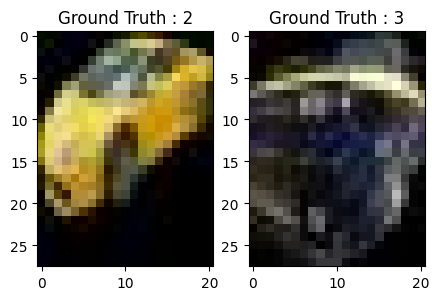

In [7]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

Esta sección del código convierte los datos de imágenes a tipo de dato float32 y normaliza los valores de píxel para que estén en el rango [0, 1]. Luego, visualiza una imagen del conjunto de datos de prueba. La normalización es crucial para el entrenamiento efectivo de modelos de aprendizaje automático.

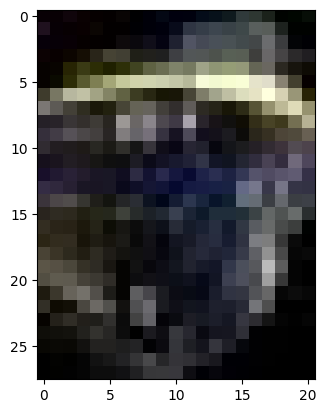

In [8]:
rain_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X/255.
test_X = test_X/255.
plt.imshow(test_X[0,:,:])

Esta sección del código convierte las etiquetas de clase en formato entero a un formato de codificación one-hot. Esto es importante porque muchos algoritmos de aprendizaje automático, especialmente las redes neuronales, funcionan mejor con etiquetas en formato one-hot. Luego, se imprime una etiqueta antes y después de la conversión para verificar el proceso.

In [9]:
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 2
After conversion to one-hot: [0. 0. 1. 0. 0.]


Esta sección del código toma el conjunto de datos de entrenamiento y lo divide en dos conjuntos: uno para continuar el entrenamiento y otro para la validación. La validación es una parte crucial del proceso de entrenamiento de modelos de aprendizaje automático porque permite evaluar el rendimiento del modelo en datos no vistos durante el entrenamiento, ayudando a prevenir el sobreajuste.

In [10]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

Esta sección del código es útil para verificar que los conjuntos de datos se han dividido correctamente y que las formas de los datos son las esperadas. Esto asegura que los datos estén listos para ser utilizados en el entrenamiento y validación del modelo.

In [11]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(5051, 28, 21, 3) (1263, 28, 21, 3) (5051, 5) (1263, 5)


Esta sección del código define y configura varios parámetros importantes para el entrenamiento de una red neuronal. Estos parámetros incluyen la tasa de aprendizaje inicial, el número de épocas y el tamaño del lote.

In [12]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 0.001 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 95 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 16 # cantidad de imágenes que se toman a la vez en memoria

Esta sección del código define un modelo de red neuronal convolucional (CNN) utilizando la API de Keras. La red consta de varias capas, incluyendo capas convolucionales, de activación, de pooling, de normalización (Dropout) y densas (fully connected).

In [13]:
riesgo_model = Sequential()
riesgo_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(21,28,3)))
riesgo_model.add(BatchNormalization())
riesgo_model.add(MaxPooling2D((2, 2), padding='same'))
riesgo_model.add(Dropout(0.3))

riesgo_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
riesgo_model.add(BatchNormalization())
riesgo_model.add(MaxPooling2D((2, 2), padding='same'))
riesgo_model.add(Dropout(0.3))

riesgo_model.add(Flatten())
riesgo_model.add(Dense(64, activation='relu'))
riesgo_model.add(Dropout(0.3))
riesgo_model.add(Dense(nClasses, activation='softmax'))

c:\Users\avalo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
riesgo_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 21, 28, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 21, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 11, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 11, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 11, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5376)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       344,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 420,869 (1.61 MB)

 Trainable params: 420,485 (1.60 MB)

 Non-trainable params: 384 (1.50 KB)

Esta sección del código configura la función de pérdida, el optimizador y las métricas que se utilizarán durante el entrenamiento del modelo. La compilación del modelo es un paso crucial que prepara el modelo para ser entrenado con los datos.

In [15]:
riesgo_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.SGD(learning_rate=INIT_LR, decay=INIT_LR / 100),metrics=['accuracy'])

c:\Users\avalo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(



Esta sección del código entrena el modelo de red neuronal convolucional utilizando los datos de entrenamiento. Durante el entrenamiento, el modelo se ajusta iterativamente a los datos, actualizando sus parámetros para minimizar la función de pérdida. El conjunto de datos de validación se utiliza para monitorear el rendimiento del modelo y prevenir el sobreajuste.

In [16]:
riesgo_train = riesgo_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/95
316/316 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2981 - loss: 1.9057 - val_accuracy: 0.1908 - val_loss: 1.9346
Epoch 2/95
316/316 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3891 - loss: 1.4449 - val_accuracy: 0.5123 - val_loss: 1.2846
Epoch 3/95
316/316 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4457 - loss: 1.3486 - val_accuracy: 0.5471 - val_loss: 1.1662
Epoch 4/95
316/316 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4608 - loss: 1.3121 - val_accuracy: 0.5717 - val_loss: 1.1411
Epoch 5/95
316/316 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4939 - loss: 1.2656 - val_accuracy: 0.5812 - val_loss: 1.1030
Epoch 6/95
316/316 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4948 - loss: 1.2341 - val_accuracy: 0.6097 - val_loss: 1.0658
Epoch 7/95
316/316 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5258 - loss: 1.1852 - val_accuracy: 0.6017 - val_loss: 1.0447
Epoch 8/95
316/316 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5375 - loss: 1.1604 - val_accuracy: 0.

In [17]:
riesgo_model.save(r'C:\Users\avalo\Desktop\CNN carros\ModeloGenerado\carros.h5')

In [18]:
test_eval = riesgo_model.evaluate(test_X, test_Y_one_hot, verbose=1)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8646 - loss: 0.4676


In [19]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.42937761545181274
Test accuracy: 0.8670044541358948


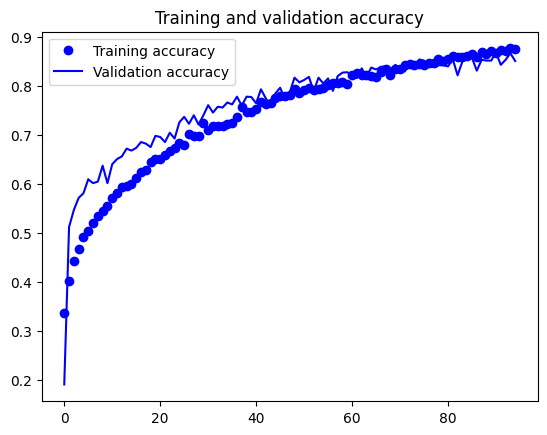

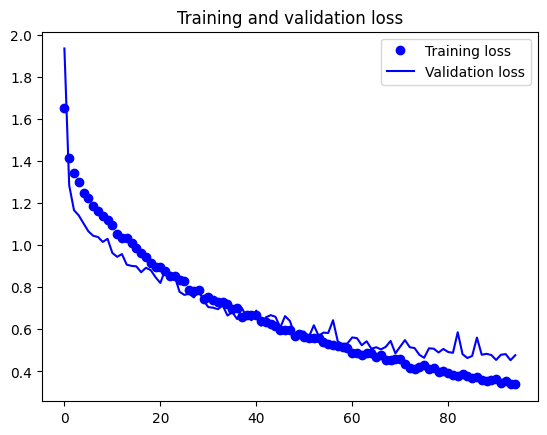

In [20]:
accuracy = riesgo_train.history['accuracy']
val_accuracy = riesgo_train.history['val_accuracy']
loss = riesgo_train.history['loss']
val_loss = riesgo_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [21]:
predicted_classes2 = riesgo_model.predict(test_X)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [22]:
predicted_classes=[]
for predicted_riesgo in predicted_classes2:
    predicted_classes.append(predicted_riesgo.tolist().index(max(predicted_riesgo)))
predicted_classes=np.array(predicted_classes)

In [23]:
predicted_classes.shape, test_Y.shape

((1579,), (1579,))

Found 1369 correct labels


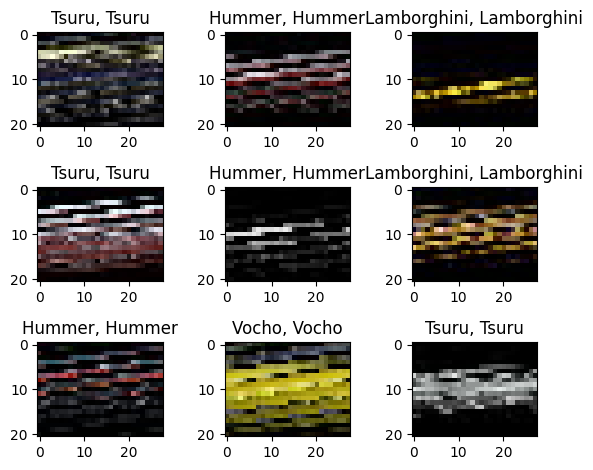

In [24]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(21,28,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(sriesgos[predicted_classes[correct]],
                                                    sriesgos[test_Y[correct]]))

    plt.tight_layout()

Found 210 incorrect labels


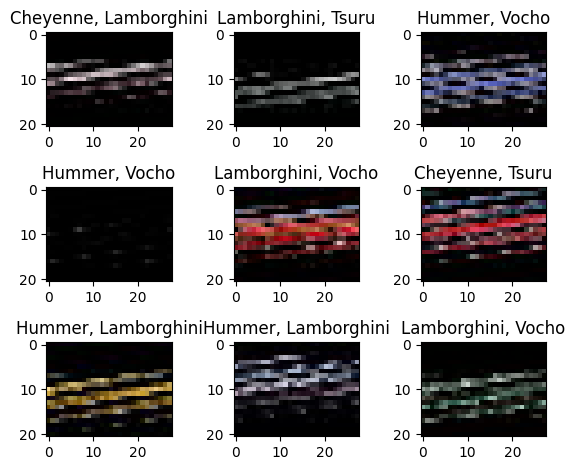

In [25]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(21,28,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(sriesgos[predicted_classes[incorrect]],
                                                    sriesgos[test_Y[incorrect]]))
    plt.tight_layout()

In [26]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.83      0.88      0.85       237
     Class 1       0.81      0.85      0.83       268
     Class 2       0.90      0.86      0.88       275
     Class 3       0.92      0.85      0.88       456
     Class 4       0.85      0.90      0.87       343

    accuracy                           0.87      1579
   macro avg       0.86      0.87      0.86      1579
weighted avg       0.87      0.87      0.87      1579



In [1]:
import os
from PIL import Image
from rembg import remove
import numpy as np
from keras.models import load_model

# Cargar el modelo h5
modelo_h5 = r'C:\Users\avalo\Desktop\CNN carros\ModeloGenerado\carros.h5'
riesgo_model = load_model(modelo_h5)

images = []

# ESPECIFICAMOS UNAS IMÁGENES
filenames = [    
    r'C:\Users\avalo\Downloads\Tsuru1.jpg',
    r'C:\Users\avalo\Downloads\cheyenne1.webp',
    r'C:\Users\avalo\Downloads\lambo1.webp',
    r'C:\Users\avalo\Downloads\hummer1.jpg',
    r'C:\Users\avalo\Downloads\vocho1.jpg',    
]

# Crear la carpeta temp si no existe
os.makedirs("temp", exist_ok=True)

for filepath in filenames:
    # Abrimos la imagen con Pillow
    try:
        with Image.open(filepath) as img:
            # Cargar la imagen
            with open(filepath, 'rb') as file:
                input_image = file.read()
            
            # Eliminar el fondo
            output_image = remove(input_image)
                
            # Guardar temporalmente la imagen sin fondo
            temp_image_path = os.path.join("temp", os.path.basename(filepath))  # Usar solo el nombre del archivo
            with open(temp_image_path, 'wb') as temp_file:
                temp_file.write(output_image)
            
            # Cargar la imagen sin fondo, redimensionarla y convertirla a RGB si es necesario
            with Image.open(temp_image_path) as img:
                # Convertir a RGB si tiene canal alfa
                img_rgb = img.convert('RGB')
                img_resized = img_rgb.resize((21, 28))  # Asegúrate de que estas dimensiones sean correctas para tu modelo

                # Convertimos a array numpy
                image_array = np.array(img_resized)
                images.append(image_array)

    except Exception as e:
        print(f"Error al procesar la imagen {filepath}: {e}")

# Convertimos de lista a numpy array
X = np.array(images, dtype=np.uint8)

# Normalizamos los datos
test_X = X.astype('float32')
test_X = test_X / 255.0

# Realizamos la predicción
predicted_classes = riesgo_model.predict(test_X)

# Asegúrate de tener una lista de etiquetas o categorías en 'sriesgos'
sriesgos = ['Cheyenne','Hummer', 'Lamborghini', "Tsuru", 'Vocho']  # Reemplaza con tus etiquetas reales

for i, img_tagged in enumerate(predicted_classes):
    print(f"{filenames[i]} -> {sriesgos[np.argmax(img_tagged)]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
C:\Users\avalo\Downloads\Tsuru1.jpg -> Tsuru
C:\Users\avalo\Downloads\cheyenne1.webp -> Cheyenne
C:\Users\avalo\Downloads\lambo1.webp -> Lamborghini
C:\Users\avalo\Downloads\hummer1.jpg -> Hummer
C:\Users\avalo\Downloads\vocho1.jpg -> Vocho
